***

<center><u><H1>NumPy e grafica</H1></u></center>

***

***
# 1 Array

**array** è un modulo built-in di Python per gli array, ovvero per una collezione di elementi salvati in locazioni adiacenti di memoria. Alcune caratteristiche fondamentali da tenere a mente, soprattutto per quando introdurremo le liste: 
- gli array contengono elementi dello stesso tipo
- gli array permettono operazioni matematiche per elemento 

Tuttavia, rispetto ad altre soluzioni sono particolarmente vantaggiosi come occupazione di memoria.

Vediamo come crearli e poi come modificare il numero di elementi: 
- creazione e aggiunta di elementi

In [1]:
import array as arr

a = arr.array('i', [1,2,3,4,5])  # è necessario indicare che passiamo degli interi
print(a)

a.append(10)
print(a)

array('i', [1, 2, 3, 4, 5])
array('i', [1, 2, 3, 4, 5, 10])


- aggiunta di elementi multipli alla fine 

In [2]:
a.extend([3, 4, 5])
print(a)

array('i', [1, 2, 3, 4, 5, 10, 3, 4, 5])


- inversione degli elementi

In [3]:
a.reverse()
print(a)

array('i', [5, 4, 3, 10, 5, 4, 3, 2, 1])


- rimozione di un elemento (il default è l'ultimo), che viene fornito come valore di uscita

In [4]:
a.pop()
print(a)

array('i', [5, 4, 3, 10, 5, 4, 3, 2])


- numero di elementi uguali ad un valore specifico

In [5]:
print(a.count(5))

2


- inserimento di un valore in una posizione specifica

In [6]:
a.insert(1, 123)
print(a)

array('i', [5, 123, 4, 3, 10, 5, 4, 3, 2])


- rimozione del primo elemento con un valore specifico

In [7]:
a.remove(4)
print(a)

array('i', [5, 123, 3, 10, 5, 4, 3, 2])


- ritorno dell'indice del primo elemento col valore indicato

In [8]:
print(a.index(5))

0


Ci sono due attributi importanti per un array built-in:
- indicazione del numero di bytes utilizzati per la sua memorizzazione (NOTA: questo è un attributo, non un metodo)
- type code utilizzato per la rappresentazione degli elementi

In [9]:
print(a.itemsize)
print(a.typecode)

4
i


Per quanto concerne le operazioni, esse sono possibili per elemento. Ciò implica che se si deve moltiplicare tutto l'array per uno scalare, si deve ricorrere a dei cicli (che vedremo nelle prossime lezioni):

In [10]:
a = arr.array('i', [1,2,3,4,5])

a[0] = a[0] + 10
print(a)

a[1] = a[1] * 2
print(a)

array('i', [11, 2, 3, 4, 5])
array('i', [11, 4, 3, 4, 5])


Se avessimo provato ad effettuare le operazioni su tutto l'array o una slice, avremmo ottenuto risultati strani...

In [11]:
a = a + 3  # errore in quanto la somma è interpretata come concatenazione

TypeError: can only append array (not "int") to array

In [12]:
a = a * 2
print(a)  # qui otteniamo la ripetizione dell'array

array('i', [11, 4, 3, 4, 5, 11, 4, 3, 4, 5])


Naturalmente, come detto negli array gli elementi devono essere dello stesso tipo:

In [13]:
a.append(1.4)

TypeError: 'float' object cannot be interpreted as an integer

Per concludere, è possibile applicare lo slicing:

In [14]:
print(a[::2])

array('i', [11, 3, 5, 4, 4])


Da notare il tipo di dato che viene fornito come risultato:

In [15]:
b = a[::2]
print(type(b))
print(b)

<class 'array.array'>
array('i', [11, 3, 5, 4, 4])


***
# 2 Numerical Python (NumPy)

Modulo principale per il calcolo scientifico avanzato che permette anche di lavorare con gli array ([documentazione](https://numpy.org/)):
- gli array NumPy contengono dati **omogenei**
- mette a disposizione, tra gli altri, metodi per l'algebra lineare e Fast Fourier Transform (FFT)
- convenienti rispetto alle liste (ancora da introdurre) puramente numeriche per
    - funzioni e metodi di base
    - velocità di esecuzione (anche 50x)
  
## 2.1 Creazione

Si ricorre al costruttore della classe, chiamandolo in modi diversi:

- array 0-D, ovvero di uno scalare

In [16]:
import numpy as np

arr = np.array(42)
print(arr)

42


- array 1-D con e senza indicazione del tipo di dato degli elementi

In [17]:
arr = np.array([1, 2, 3, 4, 5])
print(arr)

[1 2 3 4 5]


In [18]:
arr = np.array([1, 2, 3, 4, 5], dtype=float)  # per definire il data type esplicitamente
print(arr)

[1. 2. 3. 4. 5.]


- array 2-D, in cui si definisce una riga alla volta e le dimensioni devono chiaramente essere compatibili

In [19]:
arr = np.array([[1, 2, 3], [4, 5, 6]]) 
print(arr)

[[1 2 3]
 [4 5 6]]


- array 3-D, in cui sono le singole matrici (array 2-D) a dover avere dimensioni compatibili

In [20]:
arr = np.array([[[1, 2, 3], [4, 5, 6]], [[1, 2, 3], [4, 5, 6]]])  
print(arr)

[[[1 2 3]
  [4 5 6]]

 [[1 2 3]
  [4 5 6]]]


- è anche possibile definire esplicitamente il numero di dimensioni, ad esempio 5

In [21]:
arr = np.array([1, 2, 3, 4], ndmin=5)
print(arr)

[[[[[1 2 3 4]]]]]


Come sarà chiaro parlando di liste, con le parentesi quadre stiamo creando una lista di valori numerici e convertendola in un array NumPy. E' possibile anche creare un array di valori unitari o nulli e definire il tipo di dato (particolarmente comodo per inizializzare gli array nella simulazione numerica, come vedremo):

In [22]:
arr = np.ones((2,3), dtype=int)
arr

array([[1, 1, 1],
       [1, 1, 1]])

In [23]:
arr = np.zeros((2,3), dtype=int)
arr

array([[0, 0, 0],
       [0, 0, 0]])

Da notare che con NumPy un array 1-D non viene modificato da una trasposizione, come indicato dalla [documentazione](https://numpy.org/doc/stable/reference/generated/numpy.transpose.html):

In [24]:
arr = np.array([1, 2, 3, 4, 5])
print(arr)
print(arr.transpose())

[1 2 3 4 5]
[1 2 3 4 5]


Se si ha bisogno di un array colonna, è necessario aggiungere una dimensione. Per farlo ci sono diversi modi, ma vediamo un paio di esempi: 

In [25]:
print(arr[:, np.newaxis])
print("-"*60)
print(arr.reshape((arr.size, 1)))

[[1]
 [2]
 [3]
 [4]
 [5]]
------------------------------------------------------------
[[1]
 [2]
 [3]
 [4]
 [5]]


## 2.2 Attributi importanti

Vi sono numerosi attributi associati ad un oggetto nparray che possono essere molto utili a seconda del programma/progetto da scrivere. Alcuni sono elencati di seguito:

In [26]:
print(arr.shape)  # dimensioni
print(arr.shape[0])  # righe
print(arr.size)  # numero di elementi
print(arr.ndim)  # numero di dimensioni
print(arr.dtype)  # data type fornito come oggetto di una sotto-classe di numpy.dtype
print(arr.dtype.name)  # data type fornito come stringa

(5,)
5
5
1
int64
int64


## 2.3 Indicizzazione e slicing

Si comportano come delle sequenze (che vedremo presto), per cui indicizzazione e slicing sono applicati come già discusso:

In [27]:
# 1-D
arr = np.array([1, 2, 3, 4, 5])
print(arr[0])
print(arr[-1])
print(arr[2] + arr[3])
print("-"*60)

# 2-D
arr = np.array([[1, 2, 3], [4, 5, 6]])
print(arr)
print(arr[0,2])
print(arr[0][2])  # equivalente alla singola quadra con virgole
print(arr[1, 0:2])

1
5
7
------------------------------------------------------------
[[1 2 3]
 [4 5 6]]
3
3
[4 5]


## 2.4 Data type e reshape

In [28]:
print(arr.dtype)
newarr = arr.astype(float)
print(newarr.dtype)

int64
float64


In [29]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
print(arr)
newarr = arr.reshape(4, 3)
print(newarr)

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


## 2.5 Iterazione, concatenazione e split

Dobbiamo ancora vedere il ciclo for, ma in modo abbastanza intuitivo possiamo dire che ci permette di iterare su ogni elemento dell'array, eseguendo le stesse istruzioni ad ogni iterazione:

In [30]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
for value in arr:
    print(value)
print("-"*40)
for index, value in enumerate(arr):
    print("{}: {}".format(index, value))

1
2
3
4
5
6
7
8
9
10
11
12
----------------------------------------
0: 1
1: 2
2: 3
3: 4
4: 5
5: 6
6: 7
7: 8
8: 9
9: 10
10: 11
11: 12


Il ciclo con la funzione enumerate() fornisce, ad ogni iterazione, una coppia: indice di posizione ed elemento corrispondente. Come vedremo, è molto più rapido di altre soluzioni, come contatori o metodi/funzioni di ricerca nell'array.

La concatenazione si effettua tramite il metodo concatenate(). Si deve prestare attenzione al fatto che le dimensioni degli array da concatenare siano compatibili, naturalmente.

In [31]:
# esempio 1
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])

arr = np.concatenate((arr1, arr2))

print(arr)

[1 2 3 4 5 6]


In [32]:
# esempio 2
arr1 = np.array([1, 2, 3])
arr2 = np.array([[4, 5, 6]])

arr = np.concatenate((arr1, arr2))

print(arr)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

E' possibile specificare la dimensione lungo la quale concatenare gli array:

In [33]:
# esempio 3
arr1 = np.array([[1, 2], [3, 4]])
arr2 = np.array([[5, 6], [7, 8]])

arr = np.concatenate((arr1, arr2), axis=1)

print(arr)

[[1 2 5 6]
 [3 4 7 8]]


In [34]:
# esempio 4
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])

arr = np.stack((arr1, arr2), axis=1)
print(arr)

[[1 4]
 [2 5]
 [3 6]]


Infine, è possibile separare l'array in sub-array in modo piuttosto semplice, a patto che le dimensioni siano coerenti:

In [35]:
arr = np.array([1, 2, 3, 4, 5, 6])

newarr = np.array_split(arr, 3)

print(newarr)
print(newarr[1])

[array([1, 2]), array([3, 4]), array([5, 6])]
[3 4]


## 2.6 Ricerca e operazioni

Poter effettuare ricerche all'interno dell'array è chiaramente fondamentale. Tale operazione si può implementare in diversi modi:

- tramite il metodo where(), che fornisce l'indice di posizione in cui si trova quel valore

In [36]:
arr = np.array([1, 2, 3, 4, 5, 4, 4])

x = np.where(arr == 4)

print(x)
print(arr[x])

(array([3, 5, 6]),)
[4 4 4]


- tramite array logici

In [37]:
# opzione 1
arr = np.array([1, 2, 3, 4, 5, 4, 4])

x = [False, False, False, True, True, True, True]

newarr = arr[x]

print(newarr)

print(arr[[False, False, False, True, True, True, True]])

# opzione 2

print(arr[arr > 3])

[4 5 4 4]
[4 5 4 4]
[4 5 4 4]


NumPy mette a disposizione diversi metodi per calcolare le statistiche di array numerici, come le seguenti;

In [38]:
arr = np.array([0, 1, 2, 3, 4])

print(f"valore medio: {arr.mean()}")
print(f"deviazione standard: {arr.std()}")
print(f"massimo: {arr.max()}")
print(f"minimo: {arr.min()}")

# somma
arr_2 = np.array([5, 6, 7, 8, 9])

print(arr + arr_2)
print(arr + 3)
print("-"*50)

# moltiplicazione
print(arr * 3)
print(arr * arr_2)  # operazione element-wise
print("-"*50)

# dot product
print(np.dot(arr, arr_2))
print(arr @ arr_2)  # prodotto matriciale

valore medio: 2.0
deviazione standard: 1.4142135623730951
massimo: 4
minimo: 0
[ 5  7  9 11 13]
[3 4 5 6 7]
--------------------------------------------------
[ 0  3  6  9 12]
[ 0  6 14 24 36]
--------------------------------------------------
80
80


Per effettuare la moltiplicazione tra due array, si deve prestare attenzione. Infatti, l'operatore * calcola il prodotto element-wise dei due array. Per ottenere il prodotto matriciale, si deve ricorrere all'operatore @:

In [39]:
A = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])

A * A

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [40]:
A @ A

array([[3, 3, 3],
       [3, 3, 3],
       [3, 3, 3]])

In [41]:
b = np.array([1, 2, 3])
b

array([1, 2, 3])

In [42]:
A * b

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [43]:
A @ b

array([6, 6, 6])

Un'altra operazione molto utile è la somma cumulativa:

In [44]:
values = np.array([5,2,1,1,6,2,0,1])
print(values.cumsum())

[ 5  7  8  9 15 17 17 18]


Un aspetto importante da tenere in considerazione è il tempo di esecuzione delle operazioni. In particolare, quando è possibile sfruttare operazioni matriciali invece dei cicli per calcolare un risultato, si deve sempre ricorrere a tale opzione. Anche se non abbiamo ancora discusso il ciclo for, facciamo un esempio:

In [45]:
import time
import numpy as np

n = 100
A = np.ones((n, n))  # matrice quadrata di 1
B = np.ones((n, n)) * 2  # matrice quadrata di 2

# opzione 1: moltiplicazione element-wise
start = time.time()
C = A*B
end = time.time()
duration_1 = end - start
print("Prodotto element-wise: ", duration_1)
print("-" * 40)

# opzione 2: doppio ciclo for
start = time.time()
D = np.empty((n, n))
for row in range(n):
    for col in range(n):
        D[row, col] = A[row, col]*B[row, col]
end = time.time()
duration_2 = end - start
print("Ciclo for annidato: ", duration_2)
print("-" * 40)
print(f"Risparmio di tempo del {(duration_2-duration_1)/duration_2: .2%}")

Prodotto element-wise:  0.0001399517059326172
----------------------------------------
Ciclo for annidato:  0.0038619041442871094
----------------------------------------
Risparmio di tempo del  96.38%


## 2.7 Algebra lineare

[linalg](https://numpy.org/doc/stable/reference/routines.linalg.html) fornisce degli strumenti per calcoli di algebra lineare.

In [46]:
la = np.array([[1.0, 2.0], [3.0, 4.0]])
print(la)

[[1. 2.]
 [3. 4.]]


In [47]:
la.transpose()

array([[1., 3.],
       [2., 4.]])

In [48]:
np.linalg.inv(la)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

Possiamo usare linalg per risolvere un sistema di equazioni:
$$
3x_0+x_1 = 9
$$
$$
x_0+2x_1 = 8
$$

In [49]:
c0 = np.array([[3,1], [1,2]])
c1 = np.array([9,8])
solve = np.linalg.solve(c0, c1)
solve

array([2., 3.])

E' possibile calcolare autovalori ed autovettori:

In [50]:
A = np.mat("3 -2; 1 0")
A

matrix([[ 3, -2],
        [ 1,  0]])

In [51]:
eigenvalues, eigenvectors = np.linalg.eig(A)
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues:
 [2. 1.]
Eigenvectors:
 [[0.89442719 0.70710678]
 [0.4472136  0.70710678]]


Possiamo anche calcolare la [Singular Value Decomposition (SVD)](https://en.wikipedia.org/wiki/Singular_value_decomposition), una fattorizzazione che decompone la matrice in 3: una rotazione seguita da una scalatura e, infine, un'altra rotazione.

In [52]:
B = np.mat("4 11 14; 8 7 -2")
B

matrix([[ 4, 11, 14],
        [ 8,  7, -2]])

In [53]:
U, Sigma, V = np.linalg.svd(B, full_matrices=False)  # reduced SVD

In [54]:
print("U:\n", U)
print("Sigma:\n", Sigma)
print("V:\n", V)

U:
 [[-0.9486833  -0.31622777]
 [-0.31622777  0.9486833 ]]
Sigma:
 [18.97366596  9.48683298]
V:
 [[-0.33333333 -0.66666667 -0.66666667]
 [ 0.66666667  0.33333333 -0.66666667]]


In [55]:
print("Product:\n", U * np.diag(Sigma) * V)

Product:
 [[ 4. 11. 14.]
 [ 8.  7. -2.]]


## 2.8 Numeri pseudo-casuali

Generare dei numeri completamente casuali su una macchina non è possibile, dato che le macchine, per quanto potenti, hanno comunque delle risorse finite. Per avere dei numeri completamente casuali, essi dovrebbero essere forniti esternamente (ad esempio legando il valore al movimento del mouse, dati da una rete, ecc.).

Ci sono diversi metodi per generare dei numeri pseudo-casuali: generati da un algoritmo noto come Pseudo-Random Number Generator (PRNG)
- si prende un dato iniziale noto come seed (opzionale)
- un algoritmo fornisce in uscita un valore apparentemente casuale
- i valori si ripetono (tipicamente dopo molte generazioni ) ma soddisfano i criteri statistici richiesti

Modulo **numpy.random**: implementa numerosi PRNG per fornire numeri pseudo-casuali da varie distribuzioni di probabilità.


- distribuzione uniforme tra 0 e 1

In [56]:
import numpy as np
print(np.random.rand(10))

[0.09379294 0.58493026 0.98589078 0.06900139 0.99637379 0.41682632
 0.91066422 0.04293111 0.33409845 0.70092566]


- interi uniformemente distribuiti tra due valori definiti

In [57]:
print(np.random.randint(-10, 10, 3))

[-2 -9  2]


- distribuzione normale

In [58]:
print(np.random.randn(10))

[-0.88274908 -0.58221325  0.5916045  -1.86341304 -1.14321833  1.9859011
 -0.60704107  0.19615858  1.28932131  0.43805583]


- distribuzione Gaussiana con media 5 e deviazione standard 3.5

In [59]:
print(3.5 * np.random.randn(10) + 5)

[ 2.03454134  6.63838199  5.55657286  7.73107437  6.06991441 -0.58990174
  6.92394337  7.46446505  3.34954457  2.56898189]


- distribuzione di Rayleigh

In [60]:
print(np.random.rayleigh(3, 10))  # il primo ingresso è il parametro di scala della Rayleigh

[2.56270244 0.80097336 7.71860771 6.55834414 7.42161716 2.49580006
 0.45782593 4.35621645 5.37466153 2.50582015]


- distribuzione uniforme tra due valori definiti

In [61]:
print(np.random.uniform(1, 6, 20))

[5.64669727 1.43189818 3.00701518 2.99637848 2.46914608 3.37454608
 2.44517063 1.61643614 1.36668357 3.28152221 3.31762105 2.52733972
 5.09607856 4.84166507 1.98726826 4.90896991 1.18557857 3.30113661
 1.46021209 5.36616672]


- distribuzione lognormale

In [62]:
print(np.random.lognormal(0.0, 1.0, 10))

[1.43016968 0.5152464  4.47861156 0.13145301 1.78229159 7.2124215
 3.23273866 1.106326   3.92513916 0.71159711]


Un aspetto fondamentale quando si lavora con numeri pseudo-casuali è la ripetibilità dell'esperimento. Ad esempio, se stiamo valutando due algoritmi di sincronizzazione per un ricevitore, vorremmo che le caratteristiche aleatorie del canale su cui li valutiamo siano le stesse. Per questo motivo, ci occorre un sistema per ottenere nuovamente gli stessi numeri pseudo-casuali: il seed.

In [63]:
np.random.seed(0)
print(np.random.rand(20))

print("-"*60)

np.random.seed(0)
print(np.random.rand(20))

[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
 0.43758721 0.891773   0.96366276 0.38344152 0.79172504 0.52889492
 0.56804456 0.92559664 0.07103606 0.0871293  0.0202184  0.83261985
 0.77815675 0.87001215]
------------------------------------------------------------
[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
 0.43758721 0.891773   0.96366276 0.38344152 0.79172504 0.52889492
 0.56804456 0.92559664 0.07103606 0.0871293  0.0202184  0.83261985
 0.77815675 0.87001215]


Come possiamo vedere, abbiamo ottenuto esattamente gli stessi valori.

***
# 3 Matplotlib

[Matplotlib](http://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) è una dei moduli più utilizzati per i grafici scientifici, con visualizzazioni statiche, animate e interattive. 

Uno dei componenti chiave di Matplotlib è `matplotlib.pyplot`, una collezione di funzioni che permettono a Matplotlib di lavorare come MATLAB. Ogni funzione `pyplot` permette di introdurre alcune modifiche alle figure: crearla, definire il tipo di grafico, definire le label, il titolo, etc. 

Più nel dettaglio, una figura creata con Matplotlib può contenere uno o più oggetti di tipo **Axes**: classe che incapsula tutti gli elementi di un singolo sub-plot. Per qualsiasi modifica su un oggetto Axes, è sufficiente chiamare i metodi opportuni sull'oggetto. Attenzione: un oggetto Axes contiene poi due o più oggetti **Axis**, che sono gli assi del sub-plot!

Per mostrare una figura, potrebbe essere necessario chiamare su di essa il metodo show().


Per creare una figura, il modo più semplice è quello di ottenere un oggetto Figure e un oggetto Axes tramite il metodo subplots():

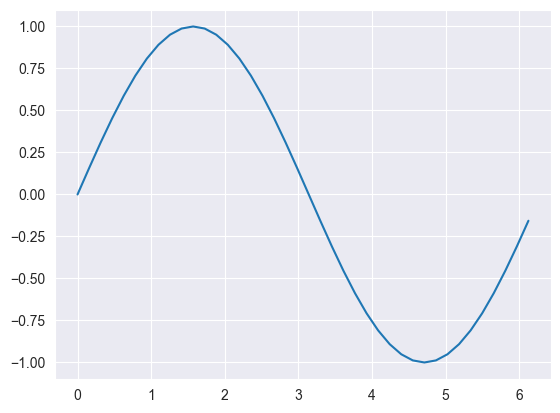

In [64]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()  # creazione di una figura con un singolo oggetto Axes
angles = np.arange(0, 2 * np.pi, 2*np.pi/40)  # creiamo un vettore di angoli tra 0 e 2*pi
values = np.sin(angles)  # calcoliamo il seno
ax.plot(angles, values)  # il metodo per graficare è chiamato sull'oggetto Axes
# plt.show()

Il metodo subplots() ha alcuni interessanti argomenti in ingresso:
- figsize: larghezza ed altezza in pollici (default: 6.4, 4.8, ottenibile con tramite il comando fig.get_size_inches())
- dpi: risoluzione della figura in dots-per-inch (default: 100)
- layout: meccanismo da utilizzare per posizionare gli elementi del plot rispetto alle decorazioni inserite per l'oggetto Axes (labels, ticks, etc.)

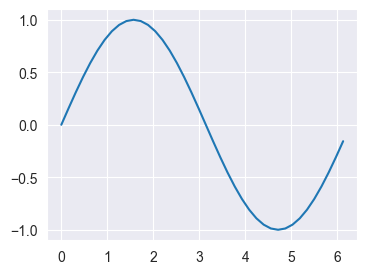

In [65]:
fig, ax = plt.subplots(figsize=(4, 3))  # creazione di una figura con un singolo oggetto Axes
angles = np.arange(0, 2 * np.pi, 2*np.pi/40)  # creiamo un vettore di angoli tra 0 e 2*pi
values = np.sin(angles)  # calcoliamo il seno
ax.plot(angles, values)  # il metodo per graficare è chiamato sull'oggetto Axes

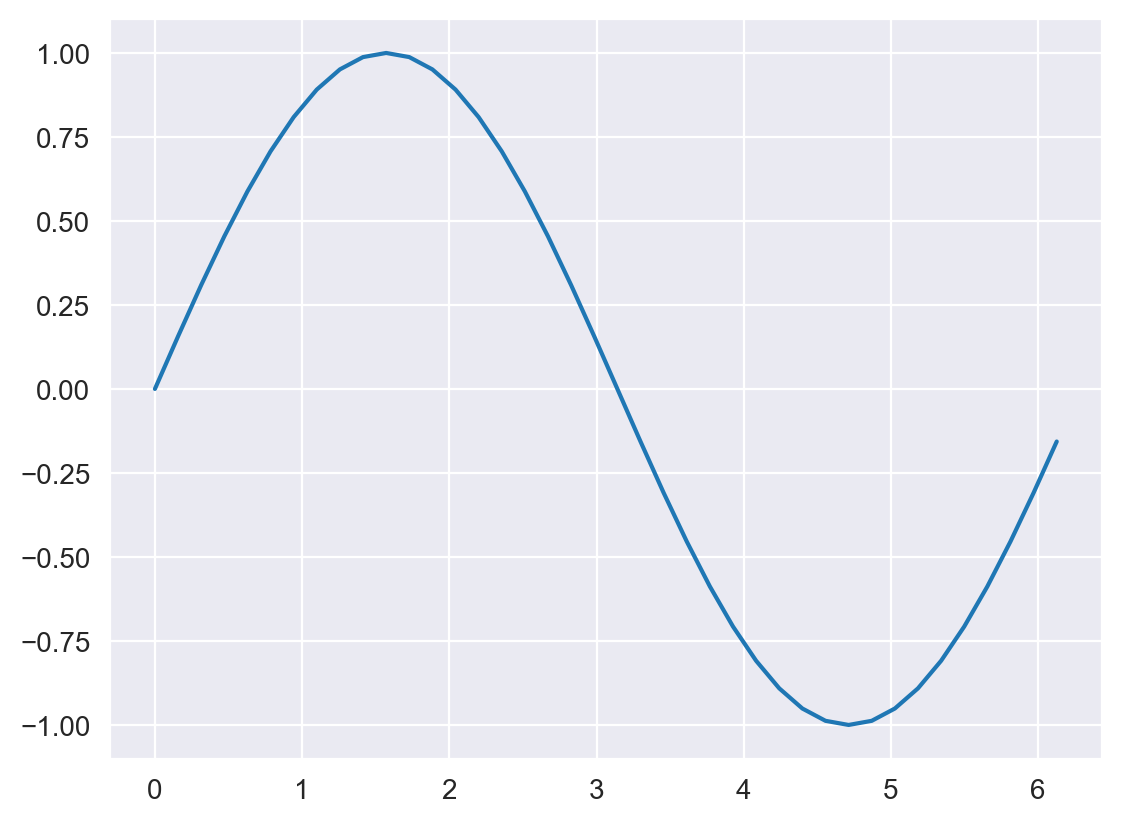

In [66]:
fig, ax = plt.subplots(dpi=200.0)  # creazione di una figura con un singolo oggetto Axes
angles = np.arange(0, 2 * np.pi, 2*np.pi/40)  # creiamo un vettore di angoli tra 0 e 2*pi
values = np.sin(angles)  # calcoliamo il seno
ax.plot(angles, values)  # il metodo per graficare è chiamato sull'oggetto Axes

Ovviamente, possiamo modificare il colore ed aggiungere dei decoratori per descrivere gli assi ed altri elementi:
- modifica dello stile della linea

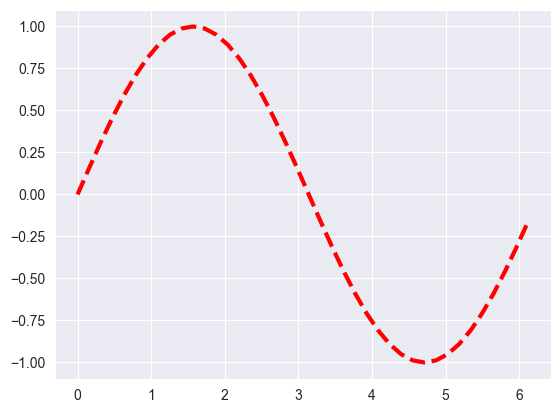

In [67]:
fig, ax = plt.subplots()  # creazione di una figura con un singolo oggetto Axes
angles = np.arange(0, 2 * np.pi, 2*np.pi/40)  # creiamo un vettore di angoli tra 0 e 2*pi
values = np.sin(angles)  # calcoliamo il seno
ax.plot(angles, values, color='red', linewidth=3, linestyle='--')  # il metodo per graficare è chiamato sull'oggetto Axes

- label, anche sfruttando i comandi LaTeX (occorre settare l'attributo plt.rcParams a True, dato che di default è falso)

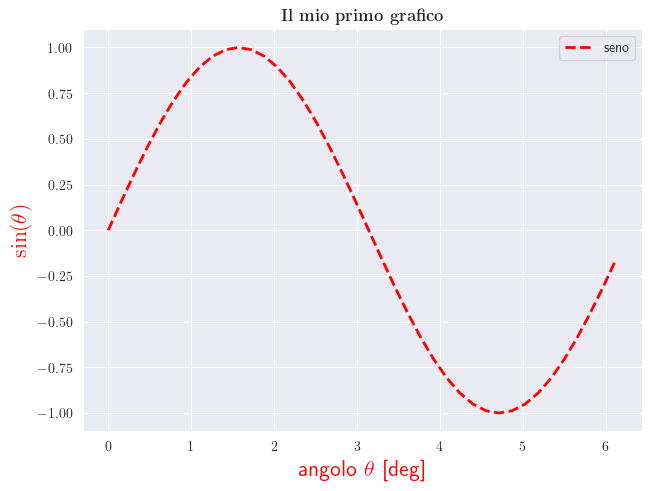

In [70]:
fig, ax = plt.subplots(layout='constrained')  # creazione di una figura con un singolo oggetto Axes
angles = np.arange(0, 2 * np.pi, 2*np.pi/40)  # creiamo un vettore di angoli tra 0 e 2*pi
values = np.sin(angles)  # calcoliamo il seno
ax.plot(angles, values, color='red', linewidth=2, linestyle='--', label='seno') 

plt.rcParams['text.usetex'] = True
ax.set_xlabel(r'angolo $\theta$ [deg]', fontsize=16, color = 'r')  # x-label
ax.set_ylabel(r'$\sin(\theta)$', fontsize=16, color = 'r')  # y-label
ax.set_title(r"\bf{Il mio primo grafico}")  # titolo
ax.legend()

- annotazioni sul grafico

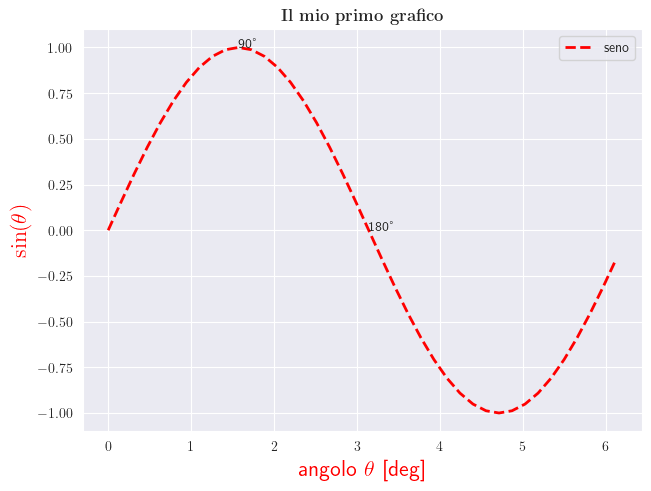

In [71]:
fig, ax = plt.subplots(layout='constrained')  # creazione di una figura con un singolo oggetto Axes
angles = np.arange(0, 2 * np.pi, 2*np.pi/40)  # creiamo un vettore di angoli tra 0 e 2*pi
values = np.sin(angles)  # calcoliamo il seno
ax.plot(angles, values, color='red', linewidth=2, linestyle='--', label='seno') 

plt.rcParams['text.usetex'] = True
ax.set_xlabel(r'angolo $\theta$ [deg]', fontsize=16, color = 'r')  # x-label
ax.set_ylabel(r'$\sin(\theta)$', fontsize=16, color = 'r')  # y-label
ax.set_title(r"\bf{Il mio primo grafico}")  # titolo

ax.text(np.pi*0.5, np.sin(np.pi*0.5), '90°')
ax.text(np.pi, np.sin(np.pi), '180°')

ax.legend()

- utilizzo dei marker

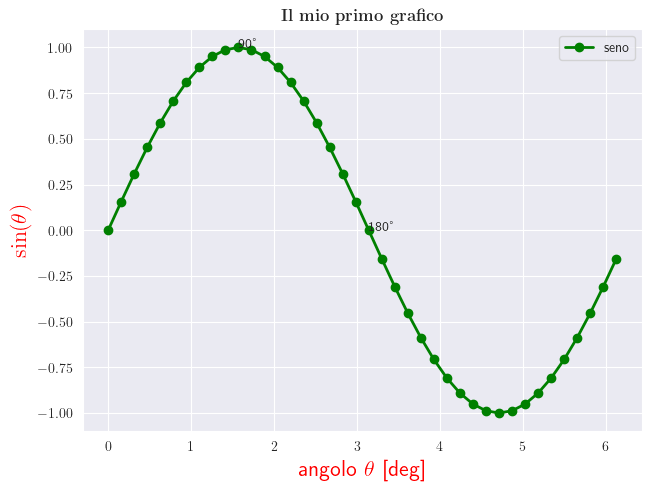

In [72]:
fig, ax = plt.subplots(layout='constrained')  # creazione di una figura con un singolo oggetto Axes
angles = np.arange(0, 2 * np.pi, 2*np.pi/40)  # creiamo un vettore di angoli tra 0 e 2*pi
values = np.sin(angles)  # calcoliamo il seno
ax.plot(angles, values, color='green', linewidth=2, linestyle='-', label='seno', marker = 'o') 

plt.rcParams['text.usetex'] = True
ax.set_xlabel(r'angolo $\theta$ [deg]', fontsize=16, color = 'r')  # x-label
ax.set_ylabel(r'$\sin(\theta)$', fontsize=16, color = 'r')  # y-label
ax.set_title(r"\bf{Il mio primo grafico}")  # titolo

ax.text(np.pi*0.5, np.sin(np.pi*0.5), '90°')
ax.text(np.pi, np.sin(np.pi), '180°')

ax.legend()

Per aggiungere curve sullo stesso grafico, è sufficiente ripetere le chiamate dei metodi sullo stesso oggetto Axes:

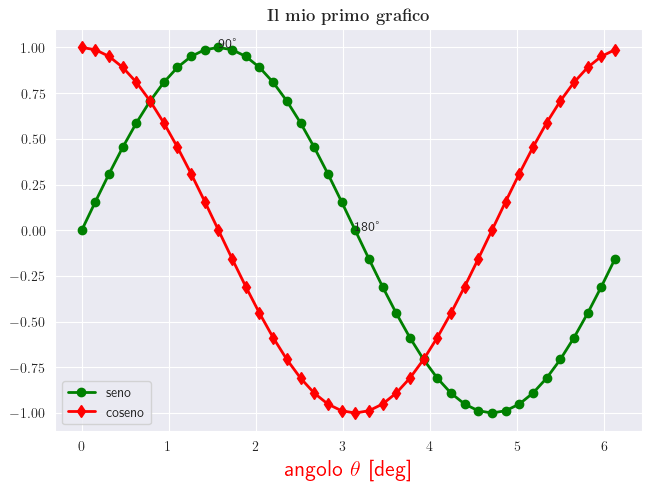

In [73]:
fig, ax = plt.subplots(layout='constrained')  # creazione di una figura con un singolo oggetto Axes
angles = np.arange(0, 2 * np.pi, 2*np.pi/40)  # creiamo un vettore di angoli tra 0 e 2*pi
values_sin = np.sin(angles)  # calcoliamo il seno
values_cos = np.cos(angles)  # calcoliamo il coseno
ax.plot(angles, values_sin, color='green', linewidth=2, linestyle='-', label='seno', marker = 'o')
ax.plot(angles, values_cos, color='red', linewidth=2, linestyle='-', label='coseno', marker = 'd') 

plt.rcParams['text.usetex'] = True
ax.set_xlabel(r'angolo $\theta$ [deg]', fontsize=16, color = 'r')  # x-label
ax.set_title(r"\bf{Il mio primo grafico}")  # titolo

ax.text(np.pi*0.5, np.sin(np.pi*0.5), '90°')
ax.text(np.pi, np.sin(np.pi), '180°')

ax.legend()

Possiamo anche modificare posizione e label dei punti sugli assi:

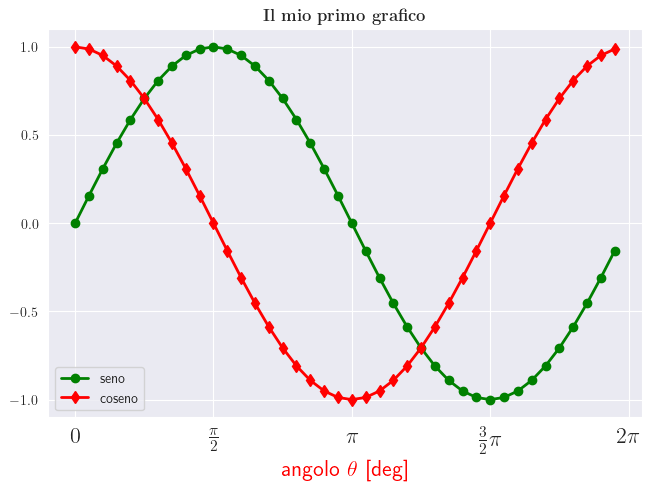

In [74]:
fig, ax = plt.subplots(layout='constrained')  # creazione di una figura con un singolo oggetto Axes
angles = np.arange(0, 2 * np.pi, 2*np.pi/40)  # creiamo un vettore di angoli tra 0 e 2*pi
values_sin = np.sin(angles)  # calcoliamo il seno
values_cos = np.cos(angles)  # calcoliamo il coseno
ax.plot(angles, values_sin, color='green', linewidth=2, linestyle='-', label='seno', marker = 'o')
ax.plot(angles, values_cos, color='red', linewidth=2, linestyle='-', label='coseno', marker = 'd') 

plt.rcParams['text.usetex'] = True
ax.set_xlabel(r'angolo $\theta$ [deg]', fontsize=16, color = 'r')  # x-label
ax.set_title(r"\bf{Il mio primo grafico}")  # titolo

ax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], 
           [r'$0$', r'$\frac{\pi}{2}$', r'$\pi$',r'$\frac{3}{2}\pi$', r'$2\pi$'], fontsize=16)
ax.set_yticks([-1, -0.5, 0, 0.5, +1])

ax.legend()

Per concludere questa introduzione, è opportuno sottolineare che si possono modificare gli stili grafici di Matplotlib: una lista è disonibile [a questo link](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html).

In [75]:
import matplotlib.pyplot as plt

print(plt.style.available) 

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [76]:
plt.style.use(['grayscale'])

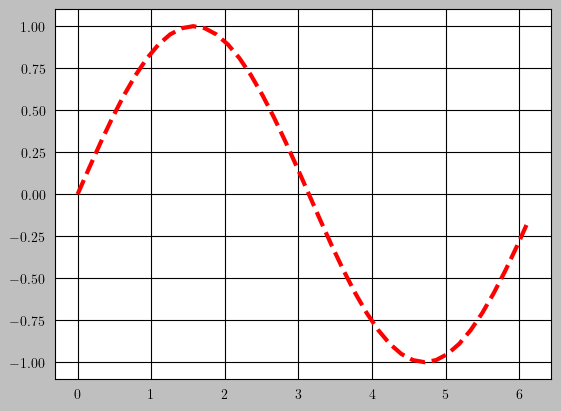

In [77]:
fig, ax = plt.subplots()  # creazione di una figura con un singolo oggetto Axes
angles = np.arange(0, 2 * np.pi, 2*np.pi/40)  # creiamo un vettore di angoli tra 0 e 2*pi
values = np.sin(angles)  # calcoliamo il seno
ax.plot(angles, values, color='red', linewidth=3, linestyle='--')  # il metodo per graficare è chiamato sull'oggetto Axes

Calcoliamo l'attenuazione di spazio libero a 1 GHz, 2 GHz, 6 GHz, 10 GHz e 20 GHz per distanze di collegamento da 1 km a 600 km.

In [78]:
distance = np.arange(1e3, 600e3, 10e3)  # da 1 km a 600 km con passo 10 km
distance = distance[:, np.newaxis]  # array colonna per ottenere una matrice dopo
frequency = np.array([1, 2, 6, 10, 20])  # frequenza in GHz

FSL = 20 * np.log10(frequency) + 20 * np.log10(distance) + 32.45
print(FSL.shape)

(60, 5)


Con il codice scritto sopra, otteniamo una matrice di attenuazioni di spazio libero dove le righe rappresentano le distanze e le colonne rappresentano le frequenze. Facciamo ora il grafico di questa matrice.

Quando si fornisce un array 2D in ingresso a plot(), le singole curve si riferiscono all'asse 0 (le righe).

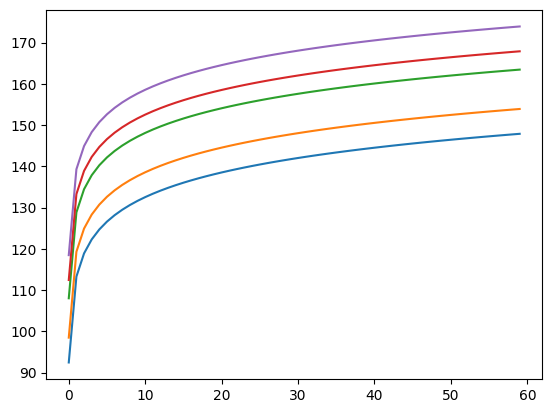

In [79]:
plt.style.use(['default'])

fig, ax = plt.subplots()  # creazione di una figura con un singolo oggetto Axes
ax.plot(FSL, linewidth=1.5) 

Sfruttiamo le conoscenze acquisite per rendere più chiaro il nostro grafico:

(0.0, 600000.0)

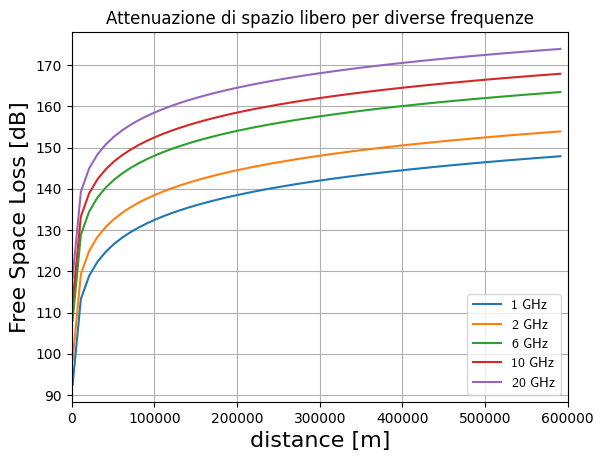

In [80]:
fig, ax = plt.subplots()  # creazione di una figura con un singolo oggetto Axes
ax.plot(distance, FSL, linewidth=1.5) 

plt.rcParams['text.usetex'] = True
# ax.set_xticks( , frequency)
ax.set_xlabel('distance [m]', fontsize=16)  # x-label
ax.set_ylabel('Free Space Loss [dB]', fontsize=16)  # y-label
ax.set_title("Attenuazione di spazio libero per diverse frequenze")  # titolo

ax.legend(['1 GHz', '2 GHz', '6 GHz', '10 GHz', '20 GHz'])

ax.grid(visible=None, which='major', axis='both')

ax.set_xlim([0, 600000])

## 3.1 Bar chart

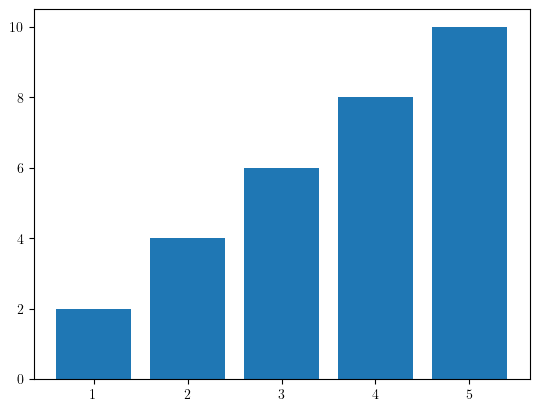

In [81]:
import matplotlib.pyplot as plt
import numpy as np

centers = np.arange(1, 6)
tops = np.arange(2, 12, 2)
plt.bar(centers, tops)
plt.show()

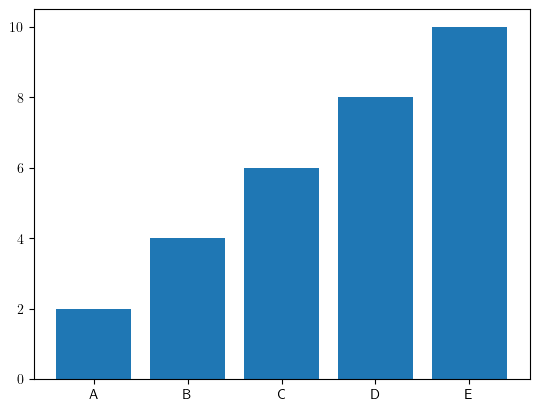

In [82]:
import matplotlib.pyplot as plt
import numpy as np

centers = np.arange(1, 6)
tops = np.arange(2, 12, 2)
plt.bar(["A", "B", "C", "D", "E"], tops)
plt.show()

## 3.2 Istogrammi

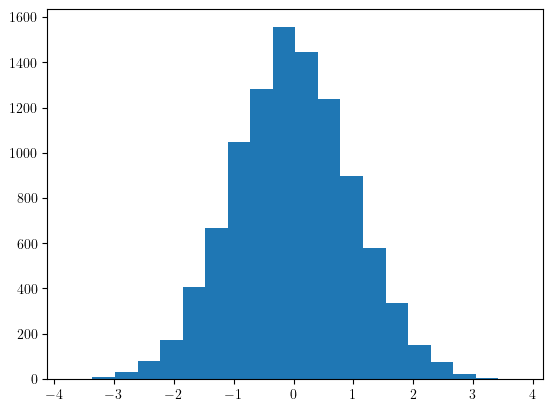

In [83]:
import matplotlib.pyplot as plt
from numpy import random

plt.hist(random.randn(10000), 20)
# plt.savefig("test.png")
plt.show()

## 3.3 Scatter plot

Gli scatter plot sono dei grafici che utilizzeremo spesso nel corso. La documentazione per la funzione scatterplot di Seaborn è disponibile a [questo link](https://seaborn.pydata.org/generated/seaborn.scatterplot.html).

Proviamo ad ottenere una distribuzione uniforme di punti all'interno di una circonferenza di raggio unitario e mostrare la posizione di ogni punto su un grafico. Questo esercizio ci permetterà anche di comprendere come ottenere questa distribuzione...

Un primo approccio potrebbe essere quello di distribuire uniformemente gli utenti in coordinate polari (angolo e raggio) ed ottenere da essi le coordinate cartesiane. Proviamo:

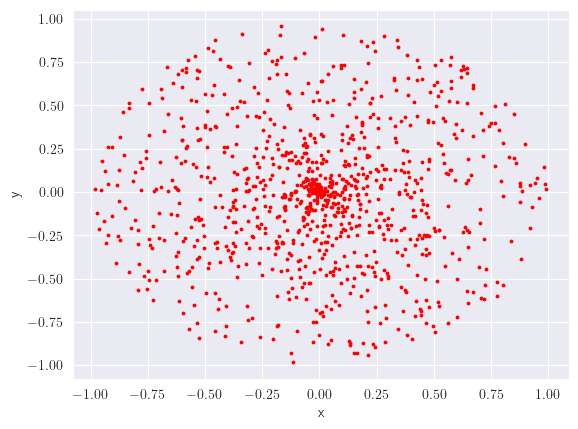

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

n_users = 1000
angles = np.random.uniform(0, 2 * np.pi, size=(n_users, 1))
radius = np.random.uniform(0, 1, size=(n_users, 1))

x = radius * np.cos(angles)
y = radius * np.sin(angles)

plt.scatter(x, y, s=3, c='r')
plt.xlabel("x")
plt.ylabel("y")
plt.show()


Sembrerebbe che la distribuzione non sia uniforme...il motivo è che all'aumentare della distanza dal centro della circonferenza, l'area coperta da corone circolari aumenta con il quadrato della distanza. Con una distribuzione uniforme del raggio, ogni distanza dal centro è uniformemente distribuita; di conseguenza, delle corone circolari distanti dal centro hanno un numero simile di punti rispetto a quelle vicine al centro...ma con un'area minore, il che aumenta la densità-

Per ovviare all'inconveniente, si utilizza la radice quadrata di una v.a. uniforme: 

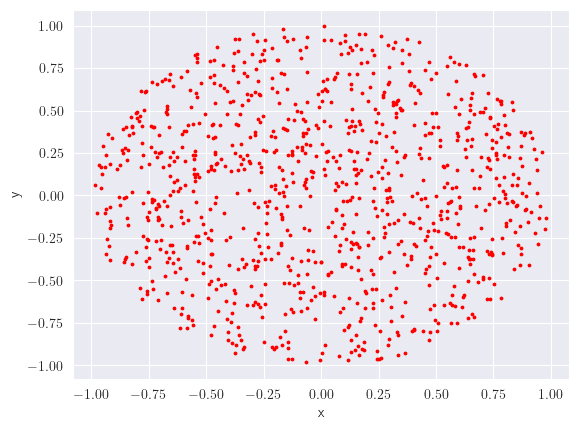

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

n_users = 1000
angles = np.random.uniform(0, 2 * np.pi, size=(n_users, 1))
radius = np.sqrt(np.random.uniform(0, 1, size=(n_users, 1)))

x = radius * np.cos(angles)
y = radius * np.sin(angles)

plt.scatter(x, y, s=3, c='r')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

E' anche possibile definire dei gruppi per lo scatter plot o una scala di colori (se si ha un valore associato ad ogni punto). Ad esempio, definiamo 3 gruppi casuali a cui possono appartenere questi punti:

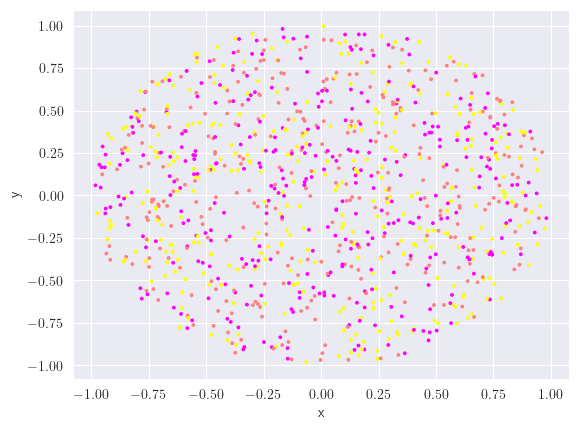

In [86]:
group = np.random.randint(1, 4, size=(n_users, 1))

plt.scatter(x, y, s=3, c=group, cmap='spring')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Un altro tipo di colorazione che potremmo seguire è basata sulla distanza dal centro:

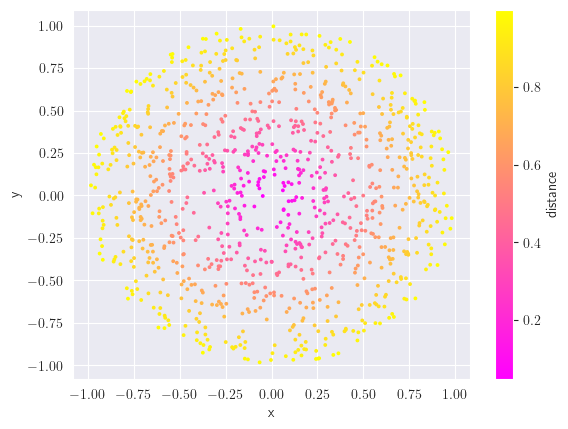

In [87]:
d = np.sqrt(x**2 + y**2)

plt.scatter(x, y, s=3, c=d, cmap='spring')
plt.xlabel("x")
plt.ylabel("y")
cbar = plt.colorbar()
cbar.set_label('distance')
# plt.clim(0,0.2)
plt.show()



***
# 4 Seaborn

Modulo di visualizzazione di dati e statistica basato su Matplotlib, che si integra strettamente con il modulo Pandas (e gli oggetti DataFrame). Si tratta di uno strumento molto potente per esplorare i dataset senza preoccuparsi troppo del codice per i grafici. Va sottolineato che Seaborn utilizza Matplotlib per realizzare le figure, anche se non esplicitamente importato; in linea con questo comportamento, se si definisce uno stile per Seaborn, esso viene anche automaticamente applicato a tutti i grafici realizzati con Matplotlib!

Prima di tutto importiamo il modulo.

<Axes: >

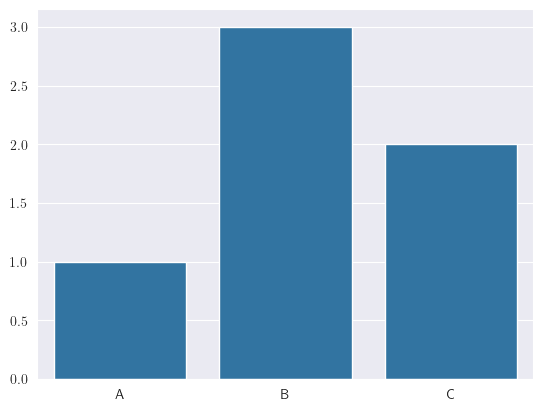

In [88]:
import seaborn as sns

sns.barplot(x=["A", "B", "C"], y=[1, 3, 2])

Il metodo [set_theme()](https://seaborn.pydata.org/generated/seaborn.set_theme.html) permette di definire lo stile ed il tema per tutti i grafici fatti con Seaborn e Matplotlib. Di default, ovvero se non chiamato, Seaborn utilizza la configurazione di Matplotlib. Con l'istruzione appena fornita, abbiamo indicato di usare per entrambi i moduli i settaggi di default di Seaborn. 

I seguenti argomenti possono essere utili da definire in partenza:
- style: lo stile della figura (darkgrid, whitegrid, dark, white, ticks)
- palette: lo stile di colori per i grafici (pastel, muted, deep, colorblind, bright, dark)
- font: tipo di carattere
- font_scale: fattore di scala per i font

Vediamoli all'opera con un grafico semplice.

<Axes: >

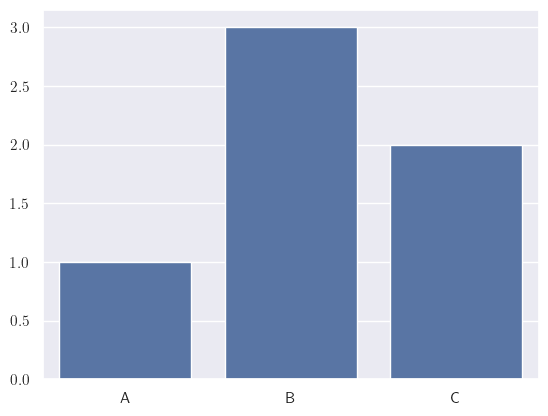

In [89]:
sns.set_theme()

sns.barplot(x=["A", "B", "C"], y=[1, 3, 2])

<Axes: >

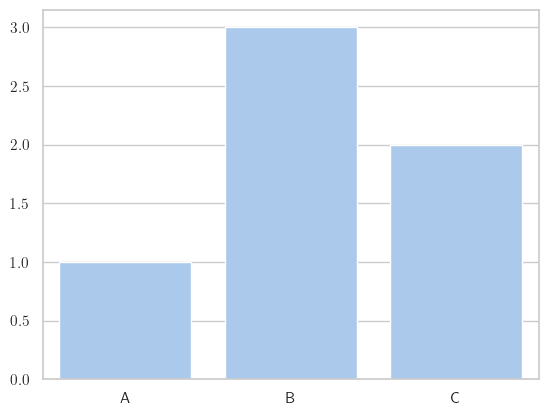

In [90]:
sns.set_theme(style="whitegrid", palette="pastel")

sns.barplot(x=["A", "B", "C"], y=[1, 3, 2])

Una guida sull'estetica delle figure è disponibile [questo link](https://seaborn.pydata.org/tutorial/aesthetics.html). E' interessante la possibilità di definire degli stili temporanei tramite un blocco di codice con la keyword **with**. Questo richiede la creazione di un oggetto Figure e la modifica dello stile degli assi: 

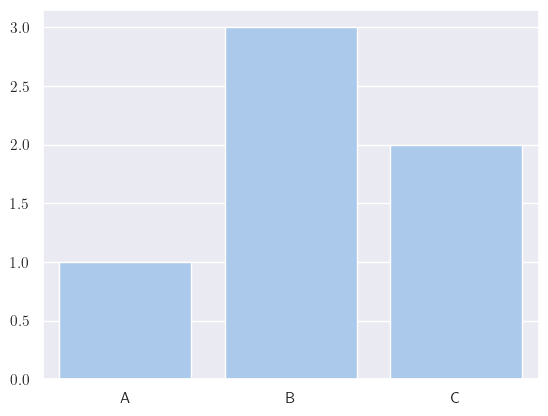

In [91]:
import matplotlib.pyplot as plt

fig = plt.figure()
gs = fig.add_gridspec(1, 1)

with sns.axes_style("darkgrid"):
    ax = fig.add_subplot()
    sns.barplot(x=["A", "B", "C"], y=[1, 3, 2])


<Axes: >

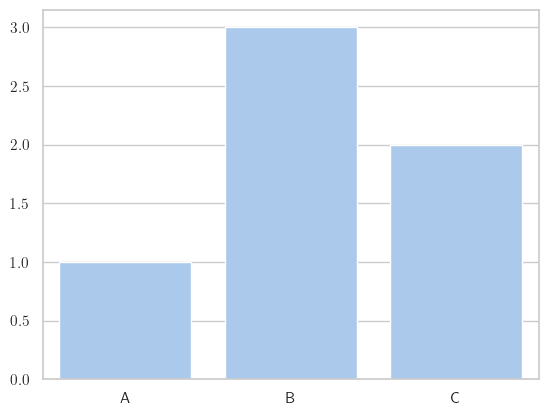

In [92]:
sns.barplot(x=["A", "B", "C"], y=[1, 3, 2])

Per comprendere meglio i concetti di Seaborn ed apprezzare i grafici dedicati alla statistica ed analisi di risultati, dovremo attendere di essere nelle fasi più avanzate del corso (in particolare l'introduzione dei DataFrame e dei concetti di Exploratory Data Analysis).

Per il momento, vediamo alcuni dei grafici più semplici, a volte ricorrendo a Matplotlib.

- istogramma ([histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html)): da notare il parametro **kde** che indica a Python se stimare la distribuzione di probabilità (kernel density estimate)

[Text(0.5, 0, 'valori'), Text(0, 0.5, 'count')]

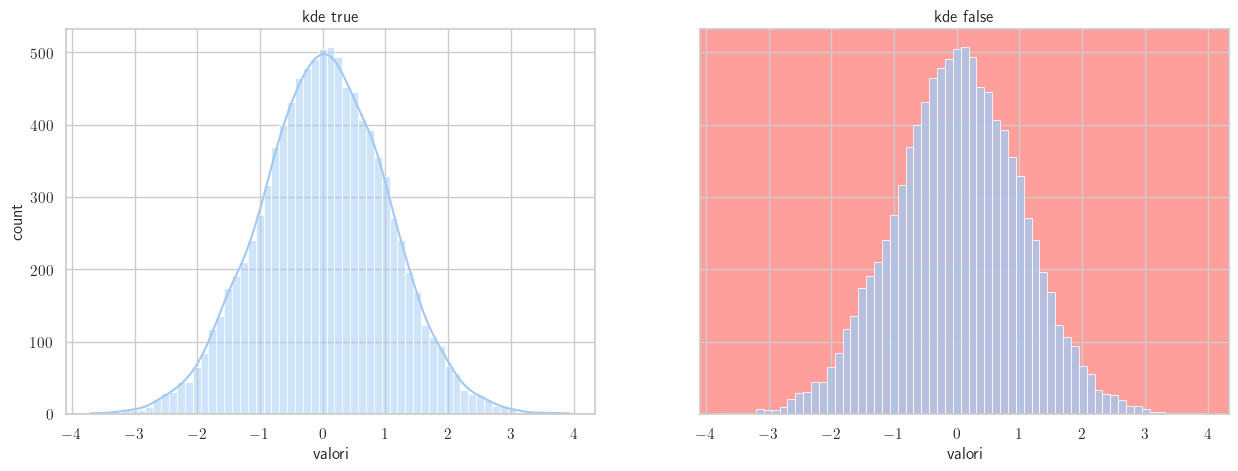

In [93]:
import numpy as np

data = np.random.randn(10000)

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)  # sharey: permette di condividere o meno (default) l'asse y

axes[1].set_facecolor('r')  # cambiamo lo sfondo della figura a destra (axes[1])

sns.histplot(ax = axes[0], x = data, kde=True)  # indichiamo su quale oggetto Axes graficare
axes[0].set_title("kde true")
axes[0].set(xlabel='valori', ylabel='count')

sns.histplot(ax = axes[1], x = data)  # indichiamo su quale oggetto Axes graficare
axes[1].set_title("kde false")
axes[1].set(xlabel='valori', ylabel='count')


Solitamente, la distribuzione viene mostrata come densità di probabilità e non con il conteggio dei valori. In questo caso, conviene quindi non condividere l'asse y ed indicare per la figura con kde=True che vogliamo la pdf:

[Text(0.5, 0, 'valori'), Text(0, 0.5, 'count')]

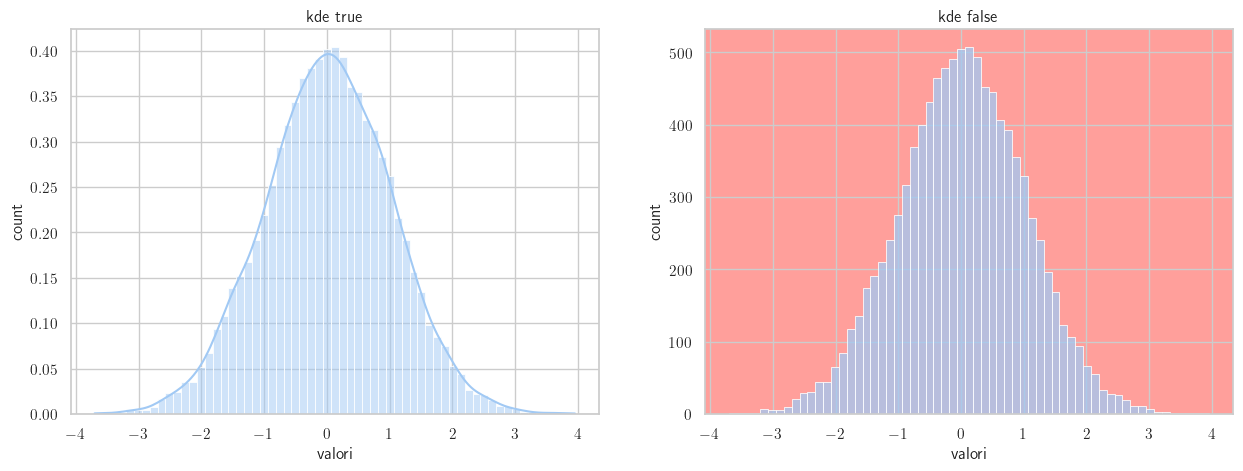

In [94]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)  # sharey: permette di condividere o meno (default) l'asse y

axes[1].set_facecolor('r')  # cambiamo lo sfondo della figura a destra (axes[1])

sns.histplot(ax = axes[0], x = data, kde=True, stat='density')  # indichiamo su quale oggetto Axes graficare
axes[0].set_title("kde true")
axes[0].set(xlabel='valori', ylabel='count')

sns.histplot(ax = axes[1], x = data)  # indichiamo su quale oggetto Axes graficare
axes[1].set_title("kde false")
axes[1].set(xlabel='valori', ylabel='count')

- [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) ci permette di visualizzare la desntià di probabilità senza i bin dell'istrogramma

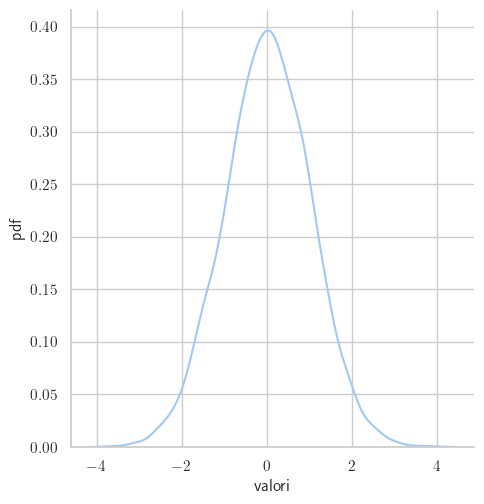

In [95]:
axes = sns.displot(x = data, kind = 'kde')
axes.set(xlabel='valori', ylabel='pdf')

Questa funzione può essere sfruttata anche per ottenere una stima della CDF (Cumulative Distribution Function):

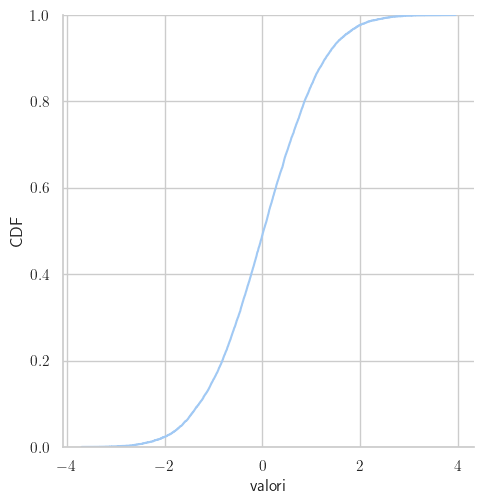

In [96]:
axes = sns.displot(x = data, kind = 'ecdf')
axes.set(xlabel='valori', ylabel='CDF')

Come indicato precedentemente, torneremo su Seaborn ed ai suoi strumenti più potenti più avanti nel corso.